In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import datasets


In [51]:
boston= datasets.load_boston()

In [52]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [53]:
features=pd.DataFrame(boston.data,columns=boston.feature_names)

In [54]:
target=pd.Series(boston.target,name="target")

In [55]:
type(target)

pandas.core.series.Series

In [56]:
data=pd.concat([features,target],axis=1)

In [57]:
data.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


so there is no null value in dataset

In [59]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


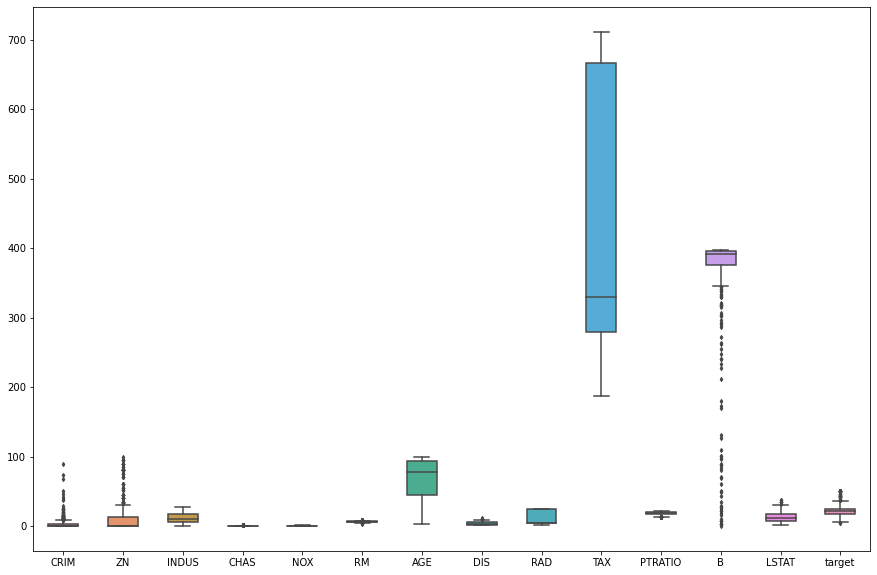

In [60]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

There are outliers in dataset

In [61]:
q = data['CRIM'].quantile(0.95)
# we are removing the top 5% data from the CRIM column
data_cleaned = data[data['CRIM']<q]

q = data_cleaned['ZN'].quantile(0.93)
# we are removing the top 7% data from the ZN column
data_cleaned  = data_cleaned[data_cleaned['ZN']<q]

q = data_cleaned['B'].quantile(0.19)
# we are removing the below 19% data from the B column
data_cleaned  = data_cleaned[data_cleaned['B']>q]

q = data_cleaned['LSTAT'].quantile(0.99)
# we are removing the top 1% data from the LSTAT column
data_cleaned  = data_cleaned[data_cleaned['LSTAT']<q]

q = data_cleaned['target'].quantile(0.99)
# we are removing the top 1% data from the target column
data_cleaned  = data_cleaned[data_cleaned['target']<q]

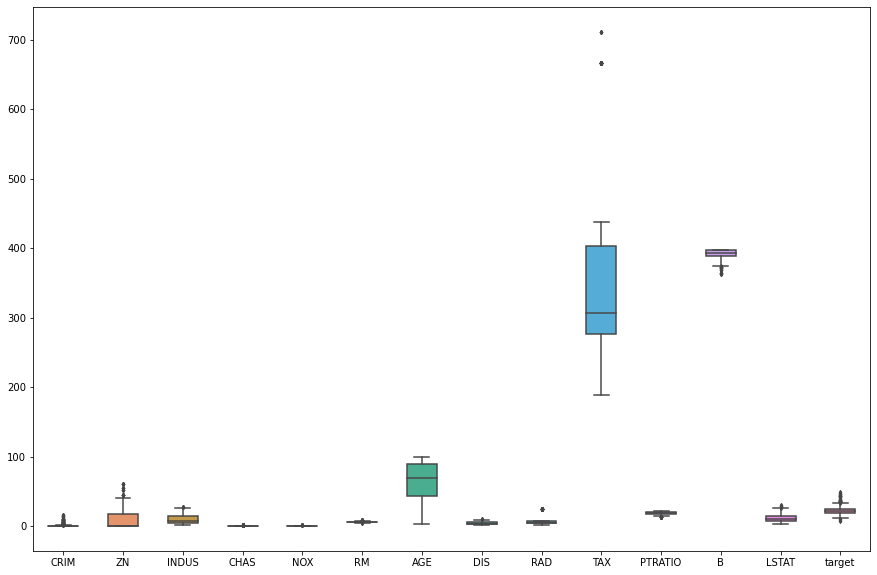

In [62]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_cleaned, width= 0.5,ax=ax,  fliersize=3)

In [63]:
data_cleaned

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


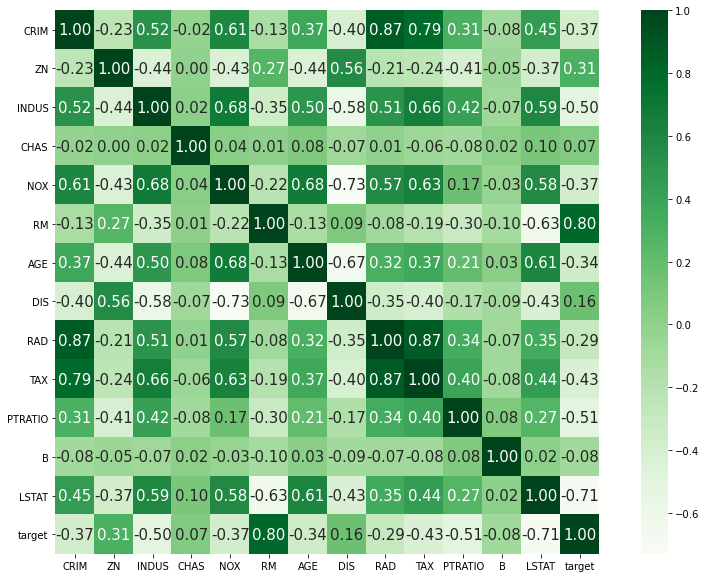

In [64]:
corr=data_cleaned.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,cbar=True,square=True,fmt='.2f',annot=True, annot_kws={'size':15},cmap='Greens')

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

Observations:

By looking at the correlation matrix we can see that RM has a strong positive correlation with target (0.8) where as LSTAT has a high negative correlation with target(-0.71).


An important point in selecting features for a regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.87. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model.  Same goes for the features DIS and AGE which have a correlation of -0.73.

same thing we can verfiry from VIF table also.

In [65]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(data_cleaned)

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = data_cleaned.columns

#let's check the values
vif

,vif,Features
0,4.965534,CRIM
1,1.860633,ZN
2,3.098319,INDUS
3,1.084723,CHAS
4,4.171440,NOX
5,4.289922,RM
6,3.166361,AGE
7,3.473775,DIS
8,7.804539,RAD
9,6.351283,TAX


Through VIF table now we can conclude that RAD and TAX are highly corelated, so we will remove one column TAX from dataset.
Out of DIS and Age we will select one because they are sharing negative relation. Right now we are ignoring target column bcz we have to predict this column(so cant be dropped). 

In [67]:

data_cleaned=data_cleaned.drop(columns=['TAX','DIS'],axis=1)


In [68]:
data_cleaned

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,RAD,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,1.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,2.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,2.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,3.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,3.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,1.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,1.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,1.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,1.0,21.0,393.45,6.48,22.0


In [69]:
# X=data.drop(columns=['target'],axis=1)
X=data_cleaned.drop(columns=['target'],axis=1)
y=data_cleaned.target

In [70]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

now we can say there is no multi-colinearity in dataset.

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 0)

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)
# regressor = RandomForestRegressor( random_state = 0)

In [75]:
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

In [76]:
y_pred=regressor.predict(X_test)

In [77]:
regressor.score(X_train,y_train)

0.976202898990417

In [78]:
regressor.score(X_test,y_test)

0.8356294061675051

In [79]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(r2)

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_test, y_pred, squared=False)
print(rms)

0.8356294061675051
3.0816789745730455


so for training we are getting 97% accuracy and for test data 83% which is less so our model can be overfitted also. so let's check through ridge technique of regularisation.

In [80]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([0.62693194, 0.13952343, 4.1652723 , 4.09496525, 8.20012518,
       6.26953258, 0.85273552, 4.76602027, 2.25645502, 8.52777659,
       2.94328739, 8.53907305, 5.67512306, 3.34277133, 1.60603033,
       4.79097916, 4.70139223, 7.20955975, 9.99453346, 2.11993622,
       4.75980961, 2.50824569, 9.49265729, 4.52475902, 9.7385982 ,
       6.53772246, 4.97235343, 5.12447176, 3.80017721, 8.03956674,
       3.94207548, 1.9896403 , 3.46184764, 8.24396178, 7.01351059,
       1.8856646 , 3.58747974, 9.89714094, 8.5375043 , 7.27660279,
       5.17701863, 1.53477235, 0.08131052, 9.2856721 , 9.57507676,
       2.87734319, 5.52418063, 6.10647043, 8.2099986 , 8.613265  ]),
        cv=10, normalize=True)

In [81]:
ridgecv.alpha_

0.13952343443246917

In [82]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.13952343443246917)

In [83]:
ridge_model.score(X_test, y_test)

0.8207275577599458

so almost accuracy for test dataset is same, so there is no overfitting in our model

if we use random forest regressor without any hyperpararmeter tuning then on training we are getting 97% ,on testing 83%.
let's use hyperparametertuning so that testing score could be improved

In [84]:
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['mse', 'mae'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [85]:
grid_search = GridSearchCV(estimator=regressor,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [86]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 20736 candidates, totalling 103680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | e

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=50, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': range(2, 20),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [90, 100, 115, 130]},
             verbose=3)

In [87]:
grid_search.best_params_

{'criterion': 'mae',
 'max_depth': 11,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 90}

In [88]:
regressor = RandomForestRegressor(criterion='mae',
 max_depth= 11,
 max_features= 'log2',
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 90)

In [89]:
regressor.fit(X_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=11, max_features='log2',
                      n_estimators=90)

In [90]:
regressor.score(X_train,y_train)

0.9711073730543676

In [91]:
regressor.score(X_test,y_test)

0.8449454598452628

so at last we can see accuracy for test dataset has improved by one percent.